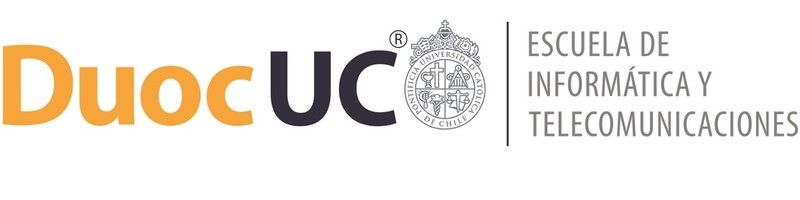

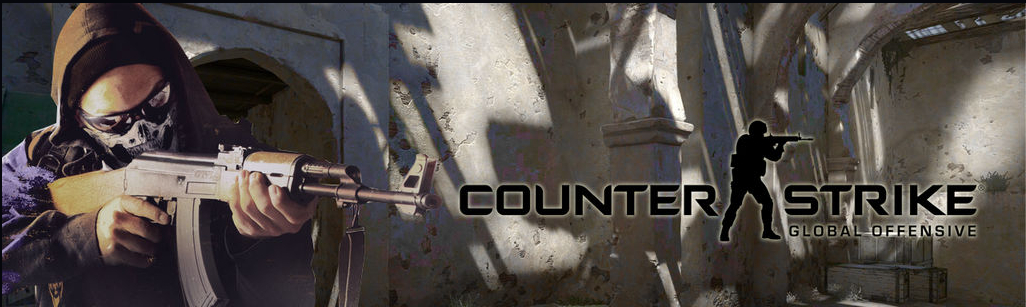

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
*
*

Docente:

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Gana","Pierde"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [ ]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
pd.set_option('display.max_columns', None)
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",None)
import math as mat

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import datetime as dt
import missingno as msno

%matplotlib inline




In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")
df.head()

Saving Anexo ET_demo_round_traces.csv to Anexo ET_demo_round_traces.csv


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [ ]:
df.shape

(79157, 30)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
df.info()

Variables : Las variables Cuantitativa discreta son las de tipo int64 son 17. Las variables Cuantitativa continua son las de tipo float64 son 4. Las variables Cualitativas son la de tipo object son 7 por ejemplo algunas son : TimeAlive , TravelledDistancen,MatchWinner. Las variables cualitativa nominal logica son los booleanos son 2 ,por ejemplo surviver, AbnormalMatch.

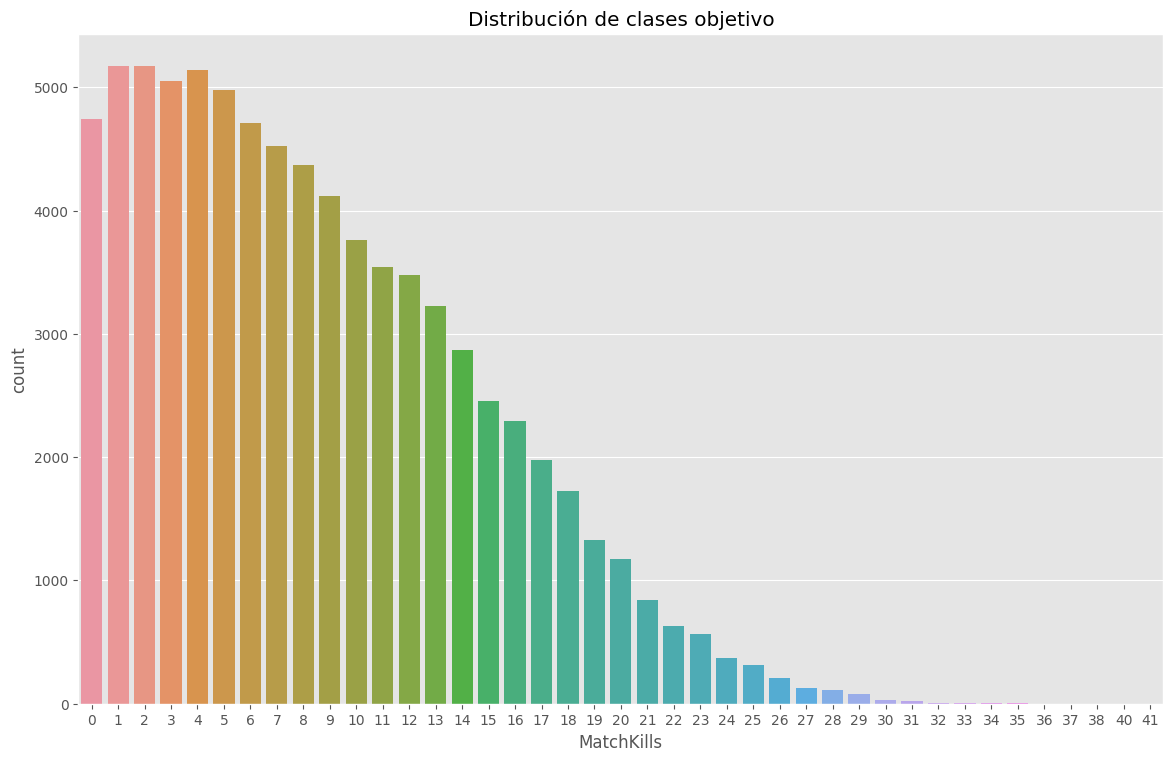

In [ ]:
# Visualizar la distribución de las clases objetivo
sns.countplot(x='MatchKills', data=df)
plt.title('Distribución de clases objetivo')
plt.show()

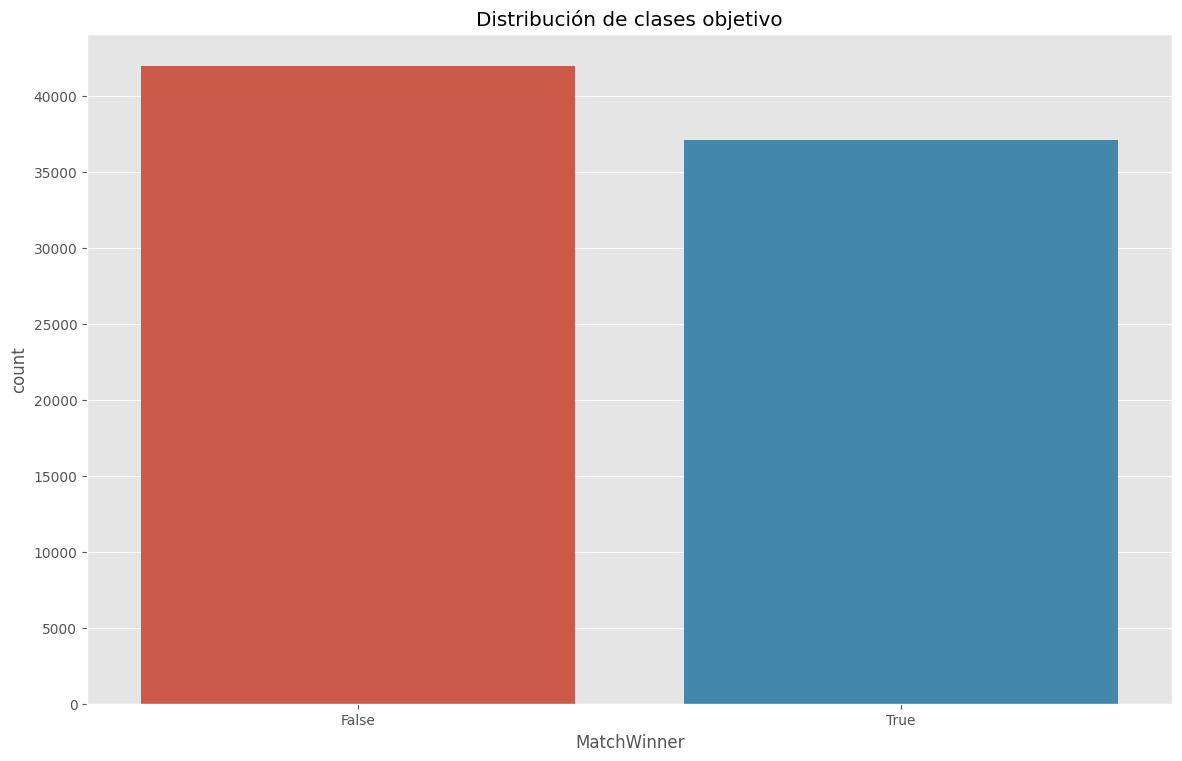

In [ ]:
# Visualizar la distribución de las clases objetivo
sns.countplot(x='MatchWinner', data=df)
plt.title('Distribución de clases objetivo')
plt.show()

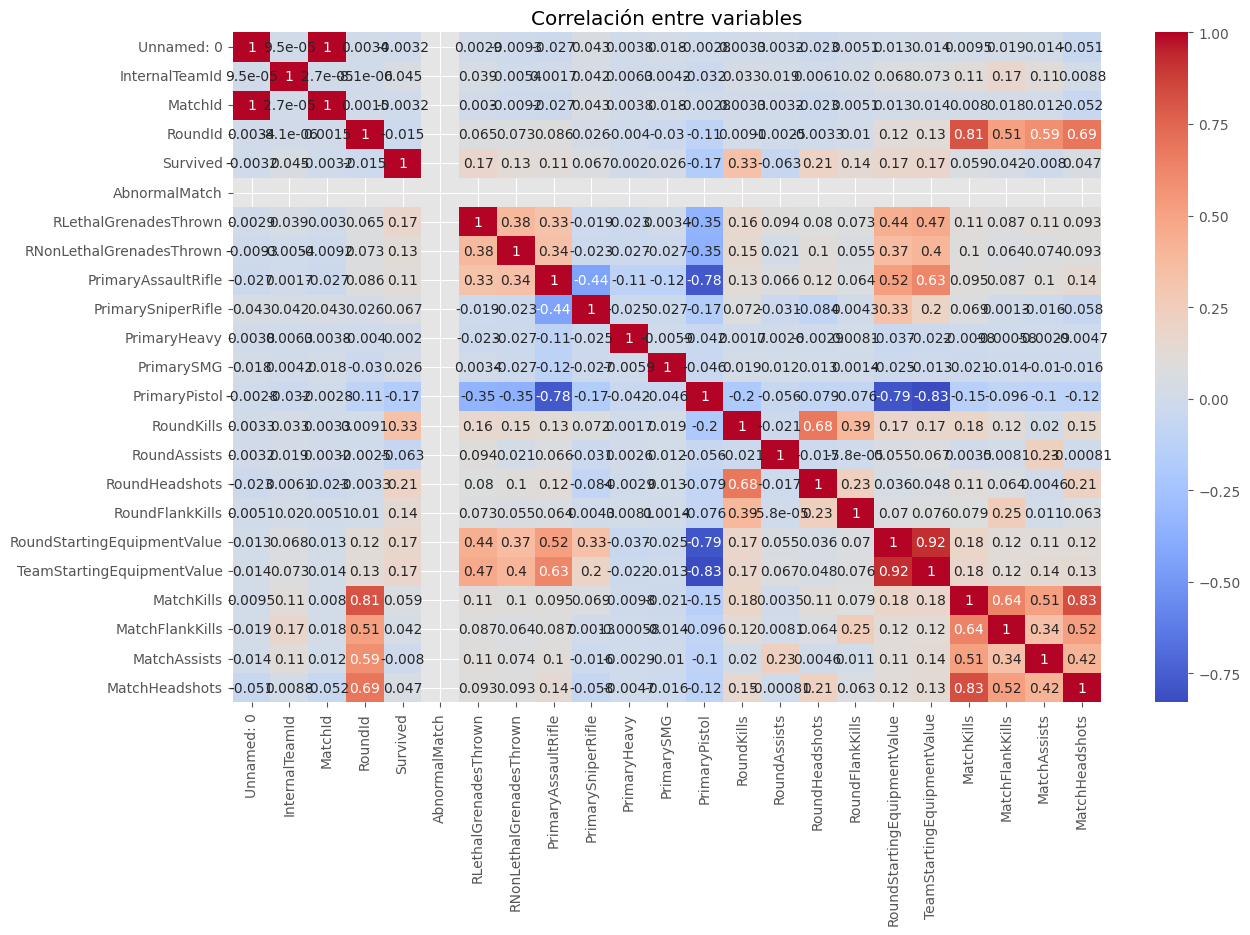

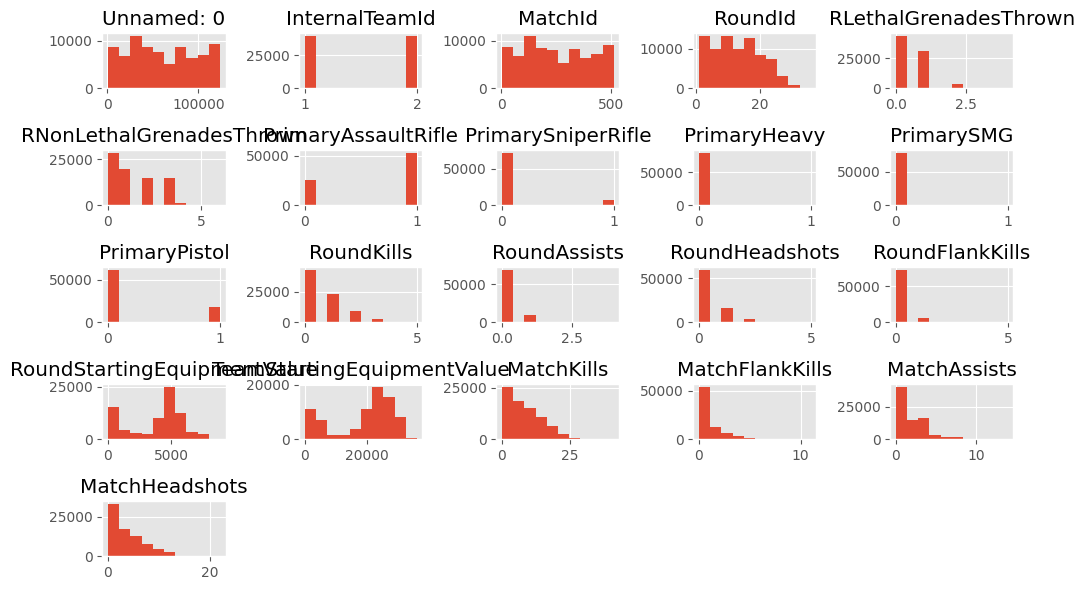

In [ ]:
# Visualizar la correlación entre las variables
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

# Graficar histogramas de variables numéricas
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


## Grafico de calor
Los valores de correlación , donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica una ausencia de correlación.Los colores del mapa de calor indican el valor de correlación, siendo los tonos más oscuros para valores negativos y los tonos más claros para valores positivos.Este gráfico es útil para identificar patrones y relaciones entre las variables.Determina las variables altamente correlacionadas y si existen relaciones lineales o no lineales entre las variables.


## Histograma
Este gráfico es útil para comprender la distribución de cada variable y detectar si alguna variable sigue una distribución particular (por ejemplo, normal, sesgada, etc.).Los ejes x e y del histograma representan los rangos y la frecuencia. También puede ayudar a identificar valores atípicos o valores extremos en las variables.

In [ ]:
df.isna().sum()


Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
df1=df

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [ ]:
df1=df.dropna(axis=0,how='any') # eliminamos los datos nulos
df1.shape

(79154, 30)

In [ ]:
df1.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

In [ ]:
df1.shape

(79154, 30)

In [ ]:
#filas duplicados
print(f'tamaño del set antes de eliminar las filas duplicadas :{df1.shape}')
df1.drop_duplicates(inplace=True)
print(f'tamaño del set despues de eliminar las filas duplicadas :{df1.shape}')

tamaño del set antes de eliminar las filas duplicadas :(79154, 30)
tamaño del set despues de eliminar las filas duplicadas :(79154, 30)


In [ ]:
df1.drop(['RoundWinner'],axis=1)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,340.272.074.099.723,4.048.177.852.924.460,1,1,1.0,0.0,0.0,0.0,0,2.277.596,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,2.926.105.436.288.080,3.213.477.612.567.870,0,0,1.0,0.0,0.0,0.0,0,28.714.119,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,5.914.717.797.783.930,6.005.168.938.274.500,1,1,1.0,0.0,0.0,0.0,0,297.689.228,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,42.582.842.797.783.900,27.987.628.542.398.100,0,2,0.0,1.0,0.0,0.0,0,7.528.178,0,0,0,0,4950,27100,1,0,1,0


In [ ]:
#df1['TimeAlive'] = df1['TimeAlive'].str.replace('.', '')
#df1['TravelledDistance'] = df1['TravelledDistance'].str.replace('.', '')
#df1['FirstKillTime'] = df1['FirstKillTime'].str.replace('.', '')


In [ ]:
#df1['TimeAlive'] = df1['TimeAlive'].apply(lambda x: '{:.0f}'.format(float(x.replace(',', '.'))) if isinstance(x, str) else x)
#df1['TravelledDistance'] = df1['TravelledDistance'].apply(lambda x: '{:.0f}'.format(float(x.replace(',', '.'))) if isinstance(x, str) else x)
#df1['FirstKillTime'] = df1['FirstKillTime'].apply(lambda x: '{:.0f}'.format(float(x.replace(',', '.'))) if isinstance(x, str) else x)

#df1['TimeAlive'] = pd.to_numeric(df1['TimeAlive'])
#df1['TravelledDistance'] = pd.to_numeric(df1['TravelledDistance'])
#df1['FirstKillTime'] = pd.to_numeric(df1['FirstKillTime'])


In [ ]:
print(df1.groupby('MatchWinner').size())

MatchWinner
False    42016
True     37138
dtype: int64


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79154 non-null  int64  
 1   Map                          79154 non-null  object 
 2   Team                         79154 non-null  object 
 3   InternalTeamId               79154 non-null  int64  
 4   MatchId                      79154 non-null  int64  
 5   RoundId                      79154 non-null  int64  
 6   RoundWinner                  79154 non-null  object 
 7   MatchWinner                  79154 non-null  object 
 8   Survived                     79154 non-null  bool   
 9   AbnormalMatch                79154 non-null  bool   
 10  TimeAlive                    79154 non-null  int64  
 11  TravelledDistance            79154 non-null  int64  
 12  RLethalGrenadesThrown        79154 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
col_categoricas= ['Map','Survived','Team']
for col in col_categoricas:
  print(f'Columna {col}: {df1[col].unique()}{df1[col].nunique()} subniveles')


Columna Map: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']4 subniveles
Columna Survived: [False  True]2 subniveles
Columna Team: ['Terrorist' 'CounterTerrorist']2 subniveles


In [ ]:
# Aplica codificación one-hot a cada columna categórica
for column in col_categoricas:
    one_hot_encoded = pd.get_dummies(df1[column], prefix=column)
    df1 = pd.concat([df1, one_hot_encoded], axis=1)
    df1.drop(column, axis=1, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79154 non-null  int64  
 1   InternalTeamId               79154 non-null  int64  
 2   MatchId                      79154 non-null  int64  
 3   RoundId                      79154 non-null  int64  
 4   RoundWinner                  79154 non-null  object 
 5   MatchWinner                  79154 non-null  object 
 6   AbnormalMatch                79154 non-null  bool   
 7   TimeAlive                    79154 non-null  object 
 8   TravelledDistance            79154 non-null  object 
 9   RLethalGrenadesThrown        79154 non-null  int64  
 10  RNonLethalGrenadesThrown     79154 non-null  int64  
 11  PrimaryAssaultRifle          79154 non-null  float64
 12  PrimarySniperRifle           79154 non-null  float64
 13  PrimaryHeavy    

RoundWinner: ['False' 'True' True False]4 subniveles

AbnormalMatch: [False]1 subniveles

In [ ]:
##df1['RoundWinner'] = df['RoundWinner'].replace([False, True], ['False', 'True'])# se unieron datos separados por nombres mal escritos
#df1['RoundWinner'].value_counts(dropna=False)

In [ ]:
#df1['RoundWinner'] = df['RoundWinner'].replace([False, True], ['False', 'True'])# se unieron datos separados por nombres mal escritos
#df1['RoundWinner'].value_counts(dropna=False)

In [ ]:
df1.shape

(79154, 35)

In [ ]:
#df1['Terrorist']= df['Team'].replace(['Terrorist', 'CounterTerrorist'],[0,1])#codificación binaria directa
#df1['CounterTerrorist']= df['Team'].replace(['Terrorist', 'CounterTerrorist'],[1,0])
#df1.head()

In [ ]:
#df1['Map'].value_counts(dropna=False)# reviso los datos para convertirlos a variables numericas

In [ ]:
#convertir a variables numericas Se asigna el valor 1 si se observa y 0 en caso contrario.
#df1['Map_de_inferno']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,0,1])
#df1['Map_de_dust2']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,0,1,0])
#df1['Map_de_mirage']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[0,1,0,0])
#df1['Map_de_nuke']= df['Map'].replace(['de_inferno', 'de_dust2', 'de_mirage', 'de_nuke'],[1,0,0,0])
#df1.head()

In [ ]:
df1.shape

(79154, 35)

In [ ]:
df1.dtypes


MatchWinner                     object
TimeAlive                       object
TravelledDistance               object
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValue       int64
MatchKills                       int64
MatchFlankKills                  int64
MatchAssists                     int64
MatchHeadshots                   int64
Map_de_dust2                     uint8
Map_de_inferno                   uint8
Map_de_mirage                    uint8
Map_de_nuke                      uint8
Survived_False           

Se eliminan las columnas que no utilizaremos.

In [ ]:
df1 = df1.drop(['Unnamed: 0', 'MatchId', 'RoundId','RoundWinner', 'AbnormalMatch', 'InternalTeamId'], axis=1)

In [ ]:
#df1 = df1.drop(['TimeAlive', 'Map', 'InternalTeamId','FirstKillTime'], axis=1)

In [ ]:
df1.shape

(79154, 29)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MatchWinner                  79154 non-null  object 
 1   TimeAlive                    79154 non-null  object 
 2   TravelledDistance            79154 non-null  object 
 3   RLethalGrenadesThrown        79154 non-null  int64  
 4   RNonLethalGrenadesThrown     79154 non-null  int64  
 5   PrimaryAssaultRifle          79154 non-null  float64
 6   PrimarySniperRifle           79154 non-null  float64
 7   PrimaryHeavy                 79154 non-null  float64
 8   PrimarySMG                   79154 non-null  float64
 9   PrimaryPistol                79154 non-null  int64  
 10  FirstKillTime                79154 non-null  object 
 11  RoundKills                   79154 non-null  int64  
 12  RoundAssists                 79154 non-null  int64  
 13  RoundHeadshots  

In [ ]:
df1.shape

In [ ]:
# Usaremos un método resumen de estadísticas numéricas
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
TimeAlive,79154.0,1.213436e+16,1.435135e+16,0.0,4.419176e+15,7.660139e+15,1.080375e+16,6.398288e+16
TravelledDistance,79154.0,1.207997e+16,1.286538e+16,0.0,5.224367e+15,8.771202e+15,1.324133e+16,6.668497e+16
RLethalGrenadesThrown,79154.0,4.986735e-01,5.979887e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
RNonLethalGrenadesThrown,79154.0,1.258104e+00,1.184906e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
PrimaryAssaultRifle,79154.0,6.753761e-01,4.641201e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
PrimarySniperRifle,79154.0,8.984356e-02,2.798013e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PrimaryHeavy,79154.0,5.963803e-03,7.549820e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PrimarySMG,79154.0,7.033729e-03,8.237856e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PrimaryPistol,79154.0,2.217829e-01,4.154484e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
FirstKillTime,79154.0,7.152031e+15,1.536677e+16,0.0,6.613748e+06,2.162531e+08,5.814724e+15,6.395996e+16


In [ ]:
#crear una nueva variable
df1["Total_granadas"] = df1.RLethalGrenadesThrown + df1.RNonLethalGrenadesThrown
df1.head()

,MatchWinner,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Map_de_dust2,Map_de_inferno,Map_de_mirage,Map_de_nuke,Survived_False,Survived_True,Team_CounterTerrorist,Team_Terrorist,Total_granadas
0,True,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0,1,0,0,1,0,0,1,4
1,True,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0,1,0,0,1,0,0,1,0
2,True,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,1,0,0,1,0
3,True,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0,1,0,0,1,0,0,1,0
4,True,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1,0,1,2


In [ ]:
#crear una nueva variable
df1["TotalPorcj_armas_primarias"] = (df1.PrimaryAssaultRifle + df1.PrimarySniperRifle +df1.PrimaryPistol + df1.PrimaryHeavy + df1.PrimarySMG)
df1.head()

,MatchWinner,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Map_de_dust2,Map_de_inferno,Map_de_mirage,Map_de_nuke,Survived_False,Survived_True,Team_CounterTerrorist,Team_Terrorist,Total_granadas,TotalPorcj_armas_primarias
0,True,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0,1,0,0,1,0,0,1,4,1.0
1,True,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0,1,0,0,1,0,0,1,0,1.0
2,True,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,1,0,0,1,0,1.0
3,True,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0,1,0,0,1,0,0,1,0,1.0
4,True,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0,0,0,1,0,1,2,1.0


In [ ]:
df1.shape

(79154, 34)

In [ ]:
df1 = df1.drop(['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryPistol', 'PrimaryHeavy', 'PrimarySMG'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MatchWinner                  79154 non-null  object 
 1   TimeAlive                    79154 non-null  object 
 2   TravelledDistance            79154 non-null  object 
 3   FirstKillTime                79154 non-null  object 
 4   RoundKills                   79154 non-null  int64  
 5   RoundAssists                 79154 non-null  int64  
 6   RoundHeadshots               79154 non-null  int64  
 7   RoundFlankKills              79154 non-null  int64  
 8   RoundStartingEquipmentValue  79154 non-null  int64  
 9   TeamStartingEquipmentValue   79154 non-null  int64  
 10  MatchKills                   79154 non-null  int64  
 11  MatchFlankKills              79154 non-null  int64  
 12  MatchAssists                 79154 non-null  int64  
 13  MatchHeadshots  

In [ ]:
df1=df1.drop(['TravelledDistance','RoundStartingEquipmentValue','TeamStartingEquipmentValue','FirstKillTime', 'TimeAlive'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MatchWinner                  79154 non-null  object 
 1   TimeAlive                    79154 non-null  object 
 2   TravelledDistance            79154 non-null  object 
 3   FirstKillTime                79154 non-null  object 
 4   RoundKills                   79154 non-null  int64  
 5   RoundAssists                 79154 non-null  int64  
 6   RoundHeadshots               79154 non-null  int64  
 7   RoundFlankKills              79154 non-null  int64  
 8   RoundStartingEquipmentValue  79154 non-null  int64  
 9   TeamStartingEquipmentValue   79154 non-null  int64  
 10  MatchKills                   79154 non-null  int64  
 11  MatchFlankKills              79154 non-null  int64  
 12  MatchAssists                 79154 non-null  int64  
 13  MatchHeadshots  

In [ ]:
df1.drop(['RoundKills'], axis=1)

,MatchWinner,RoundAssists,RoundHeadshots,RoundFlankKills,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Map_de_dust2,Map_de_inferno,Map_de_mirage,Map_de_nuke,Survived_False,Survived_True,Team_CounterTerrorist,Team_Terrorist,Total_granadas,TotalPorcj_armas_primarias
0,True,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,4,1.0
1,True,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.0
2,True,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.0
3,True,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1.0
4,True,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,False,0,0,0,4,0,2,2,0,0,1,0,1,0,1,0,2,1.0
79153,False,0,1,0,8,5,1,3,0,0,1,0,1,0,1,0,0,1.0
79154,False,0,0,0,5,0,2,3,0,0,1,0,1,0,1,0,2,1.0
79155,False,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,2,1.0


In [ ]:
df1.shape

(79154, 19)

In [ ]:
df2=df1

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79154 entries, 0 to 79156
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MatchWinner                 79154 non-null  object 
 1   RoundKills                  79154 non-null  int64  
 2   RoundAssists                79154 non-null  int64  
 3   RoundHeadshots              79154 non-null  int64  
 4   RoundFlankKills             79154 non-null  int64  
 5   MatchKills                  79154 non-null  int64  
 6   MatchFlankKills             79154 non-null  int64  
 7   MatchAssists                79154 non-null  int64  
 8   MatchHeadshots              79154 non-null  int64  
 9   Map_de_dust2                79154 non-null  uint8  
 10  Map_de_inferno              79154 non-null  uint8  
 11  Map_de_mirage               79154 non-null  uint8  
 12  Map_de_nuke                 79154 non-null  uint8  
 13  Survived_False              791

In [ ]:
df2=df2.drop(['Survived_True', 'Survived_False','Team_Terrorist','Team_CounterTerrorist'],axis=1)

In [ ]:
df2.shape

(79154, 15)

#Variable categorica Target : MatchWinner
Esta es nuestra variable de interes sobre la que analizaremos los jugadores que ganan partidas y que caracteristicas  se consideran relevantes y se utilizan para explicar  la relación con la variable objetivo MatchWinner.

Visualizamos en formato de historial las características de entrada con nombres y podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros

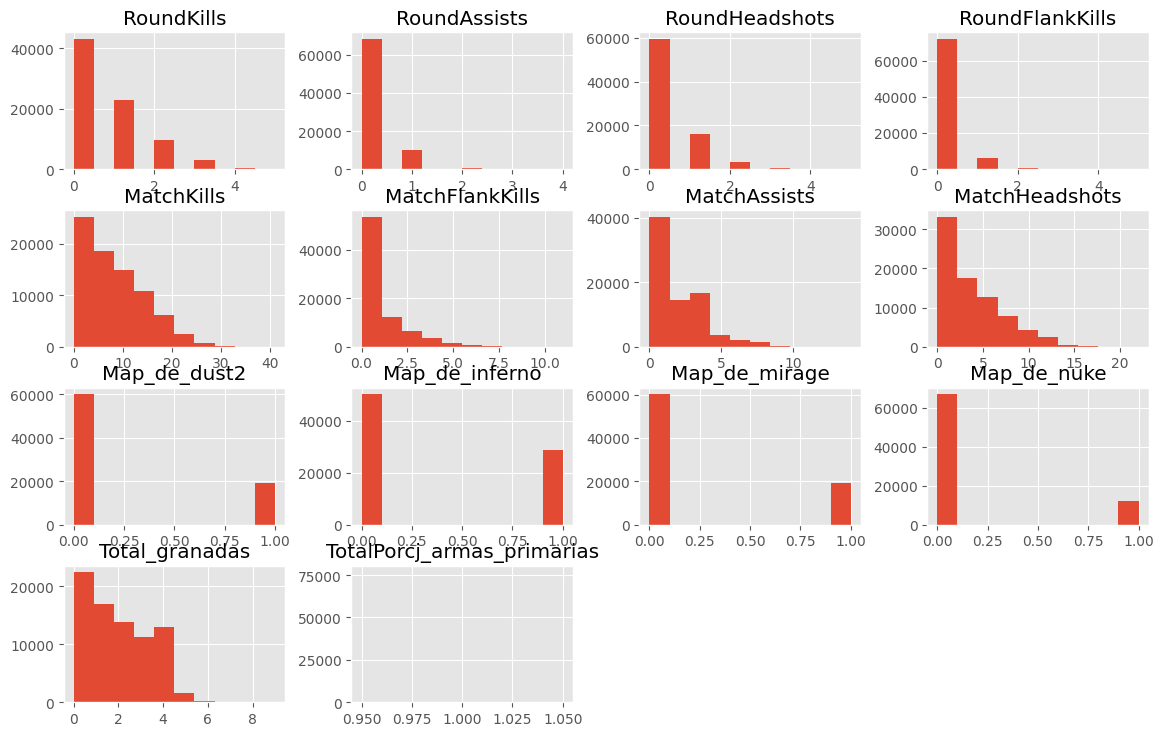

In [ ]:
df2.drop(['MatchWinner'],1).hist()
plt.show()

También podemos interrelacionar las entradas de a pares, para

---

ver como se concentran linealmente las salidas de usuarios por colores

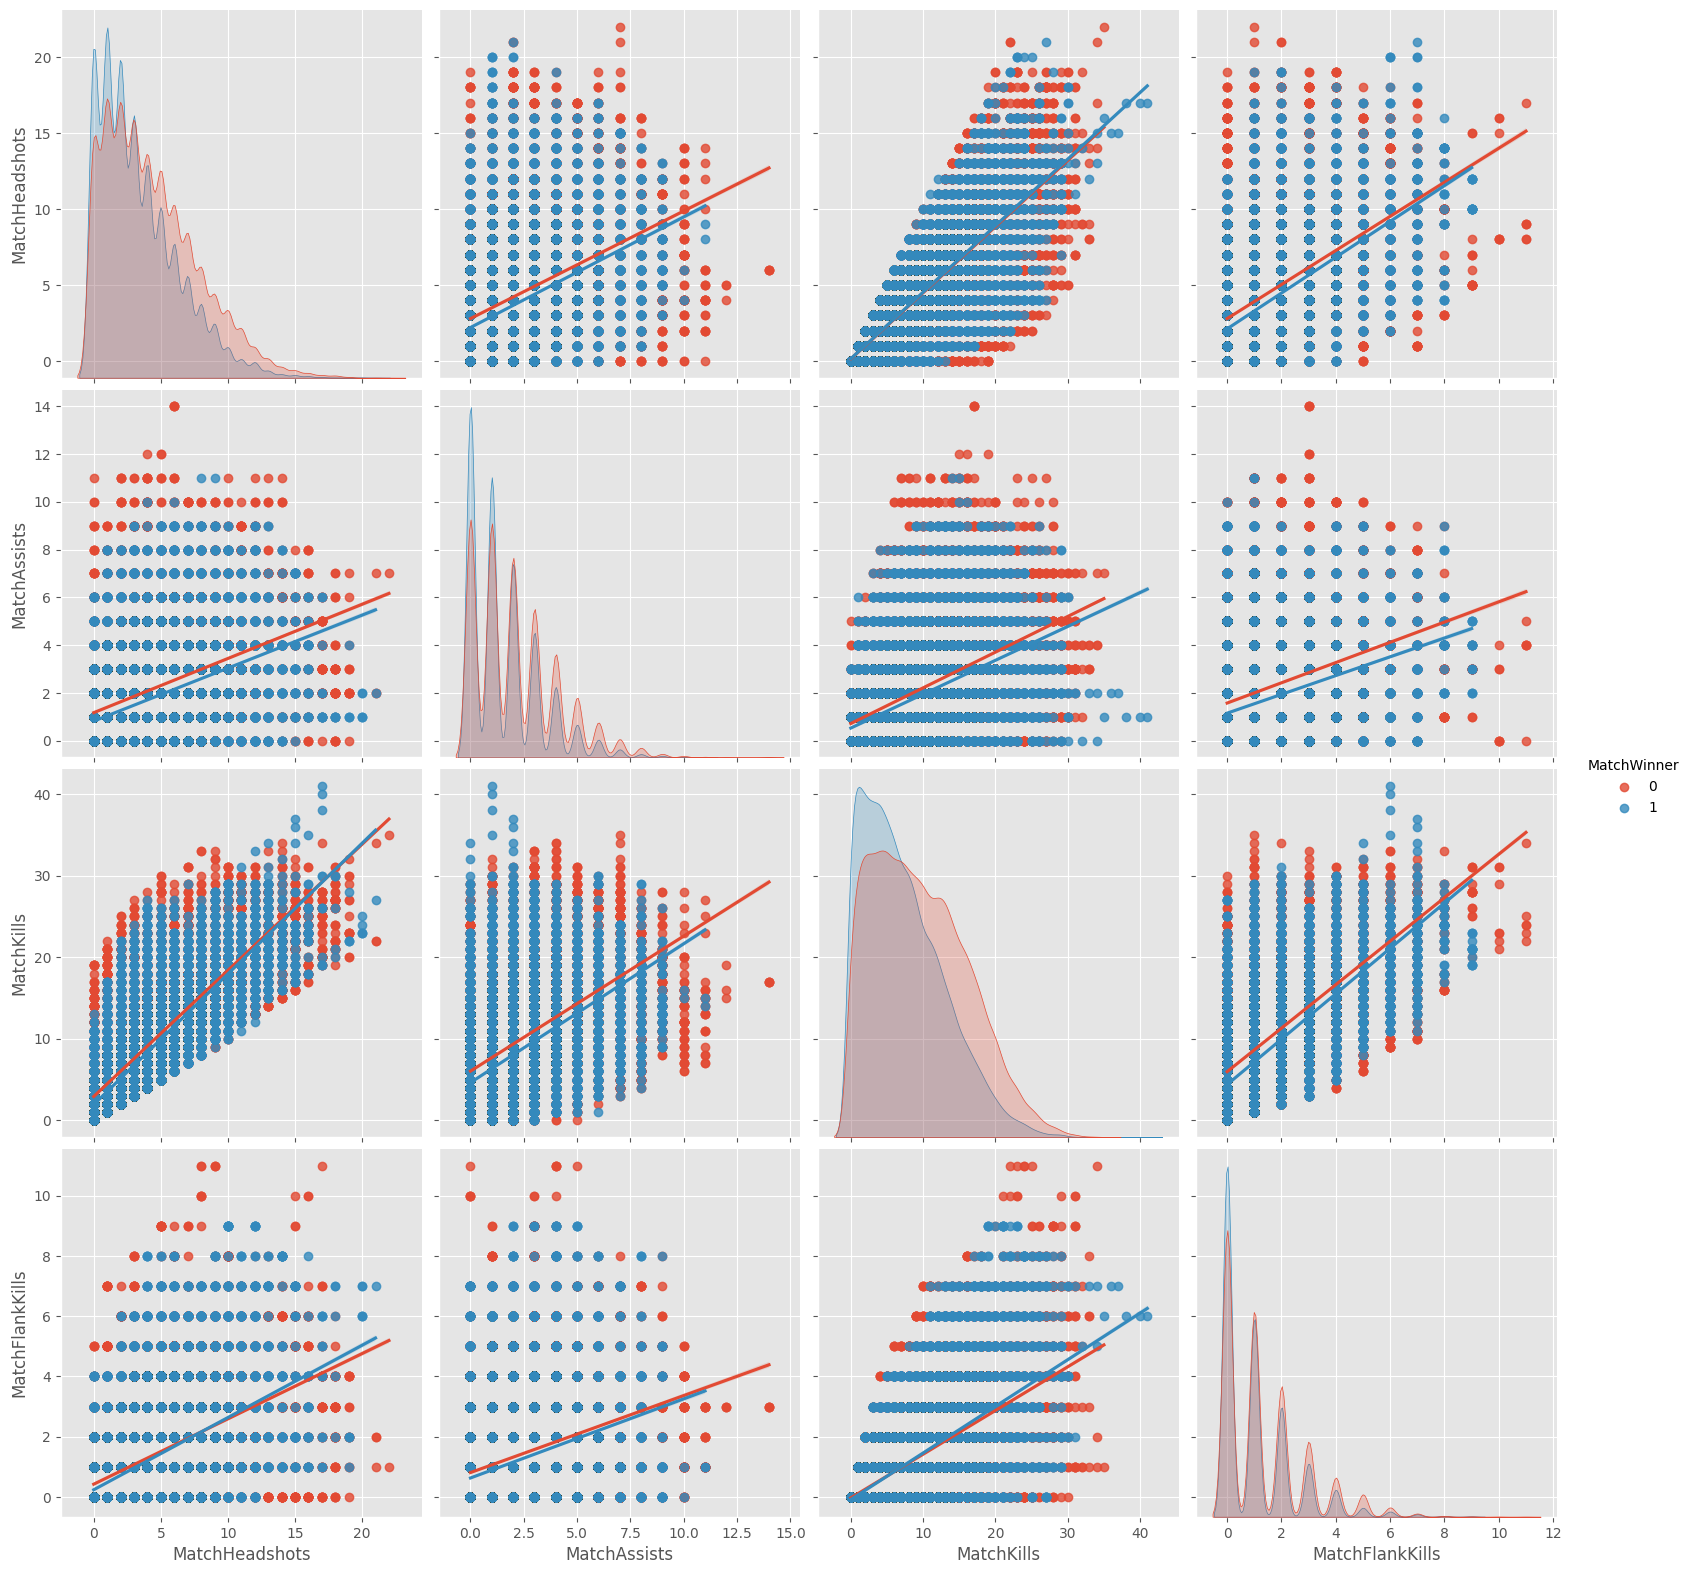

In [ ]:
sns.pairplot(df2.dropna(), hue='MatchWinner',size=4,vars=["MatchHeadshots", "MatchAssists","MatchKills","MatchFlankKills"],kind='reg')

<Axes: xlabel='MatchWinner', ylabel='Density'>

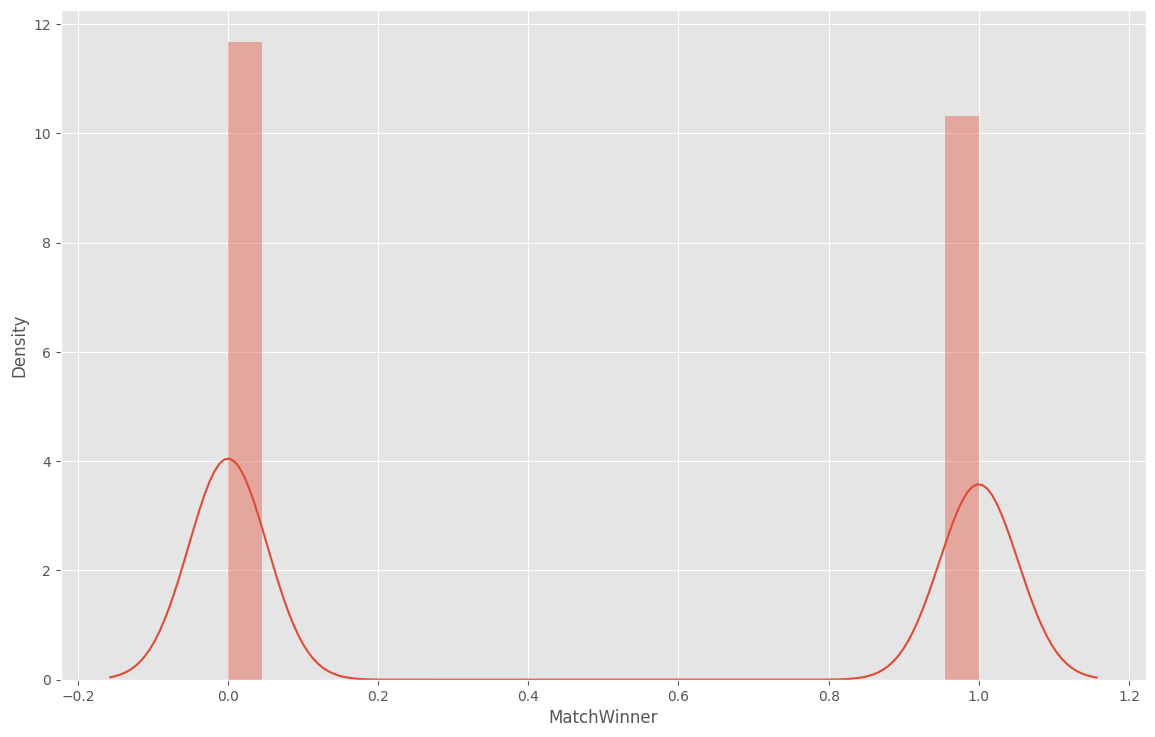

In [ ]:
sns.distplot(df2.MatchWinner)




## Fase 4: Modeling

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

### Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

In [ ]:
df2['MatchWinner'] = df2['MatchWinner'].map({True: 1, False: 0})

In [ ]:
# Extraemos la variable que vamos a estimar.
X = df2.drop(['MatchWinner'],axis=1)
y = df2['MatchWinner']


In [ ]:
y.unique()

array([1, 0])

## Vemos Desbalanceo

In [ ]:
pd.value_counts(df2['MatchWinner'], sort = True)

0    42016
1    37138
Name: MatchWinner, dtype: int64

In [ ]:
#Gana_df2 = df2[df2.MatchWinner == 1] #gana partida
#Pierde_df2 = df2[df2.MatchWinner == 0] #pierde partida

## Creamos Dataset

In [ ]:
y = df2['MatchWinner']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [ ]:
LABELS = ['False', 'True']

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero MatchWinner')
    plt.xlabel('Predicted MatchWinner')
    plt.show()
    print (classification_report(y_test, pred_y))

esta función se utiliza para visualizar la matriz de confusión y mostrar un informe de clasificación con métricas de evaluación para un modelo de clasificación.

y_test :son los valores reales del conjunto de datos de prueba, las etiquetas o la variable objetivo que se   trata de predecir.
pred_y : son las predicciones del modelo en el conjunto de datos de prueba.

## Ejecutamos Modelo Regresion Logistica

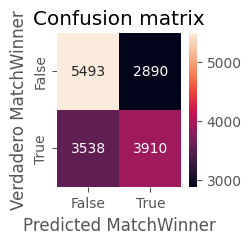

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      8383
           1       0.57      0.52      0.55      7448

    accuracy                           0.59     15831
   macro avg       0.59      0.59      0.59     15831
weighted avg       0.59      0.59      0.59     15831



In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear y ajustar el modelo de regresión logística (o cualquier otro modelo)
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
pred_y = model.predict(X_test)

# Evaluar el desempeño del modelo utilizando la función mostrar_resultados
mostrar_resultados(y_test, pred_y)


Que jugadores van a ganar la partida y segun ciertas caracteristicas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
predictions = model.predict(X_test)
print(predictions[0:10])


[0 1 0 0 1 0 0 1 1 0]


In [ ]:
model.score(X,y)

0.6010435353867145

###Se hace una búsqueda de los mejores hiperparámetros utilizando validación cruzada.

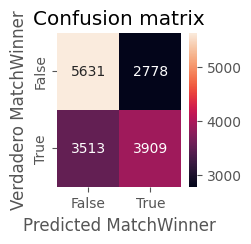

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      8409
           1       0.58      0.53      0.55      7422

    accuracy                           0.60     15831
   macro avg       0.60      0.60      0.60     15831
weighted avg       0.60      0.60      0.60     15831



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#modelo entrenado para encontrar los mejores hiperparametros
# Crear el objeto del modelo
model_lr = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5)

# Entrenar el modelo con los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)

# Obtener las mejores combinaciones de hiperparámetros y el mejor estimador
best_params = grid_search_lr.best_params_
best_estimator = grid_search_lr.best_estimator_

# Obtener las predicciones en el conjunto de prueba utilizando el mejor estimador
pred_y_lr = best_estimator.predict(X_test)
# Obtener las predicciones en el conjunto de prueba
#pred_y_lr = grid_search_lr.predict(X_test)

# Mostrar los resultados
mostrar_resultados(y_test, pred_y_lr)
# Mostrar los resultados
#print(classification_report(y_test, pred_y_lr))


este código se utiliza para entrenar un modelo de regresión logística balanceado y obtener el modelo ajustado para su posterior uso en la predicción y evaluación.






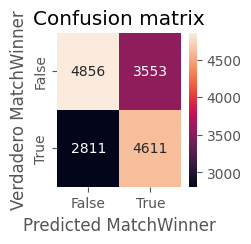

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      8409
           1       0.56      0.62      0.59      7422

    accuracy                           0.60     15831
   macro avg       0.60      0.60      0.60     15831
weighted avg       0.60      0.60      0.60     15831



In [ ]:
#Se ajusta con parametros definidos
def run_model_balanced(X_train, X_test, y_train, y_test):
    model = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="newton-cg", class_weight="balanced")
    model.fit(X_train, y_train)
    pred_y_lr = model.predict(X_test)
    mostrar_resultados(y_test, pred_y_lr)
    return model

model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y_lr = model.predict(X_test)

###Se ajusta directamente con parámetros predefinidos

La interpretación del informe de clasificación :precision: el 64% de las instancias clasificadas como clase 0(false) son realmente clase 0.La etiqueta 1(true) la precisión es del 57%, lo que indica que el 57% de las instancias clasificadas como clase 1 son realmente clase 1.

Recall: Positivas que se identifican correctamente. Para la clase 0, el recall es del 58%, lo que significa que se identifican correctamente el 58% de las instancias reales de clase 0. Para la clase 1, el recall es del 62%, lo que indica que se identifican correctamente el 62% de las instancias reales de clase 1.Un valor alto de recall indica que el modelo puede capturar bien los casos positivos.

F1-score: Es una medida que combina la precisión y el recall en un solo valor. Es útil cuando hay un desequilibrio entre las clases. El F1-score para la clase 0 es del 61%, mientras que para la clase 1 es del 59%.Un F1-score alto indica un equilibrio entre la precisión y el recall.

Support: Es el número de instancias en cada clase.

Accuracy: Es la proporción de instancias clasificadas correctamente sobre el total de instancias.La precisión general del modelo es del 60%.

Macro avg: Es el promedio de las métricas (precision, recall, F1-score) para todas las clases, sin tener en cuenta el desequilibrio de clases.

Weighted avg: Es el promedio ponderado de las métricas para todas las clases, teniendo en cuenta el desequilibrio de clases.







el modelo tiene una precisión y recall bastante similares para ambas clases, lo que indica que no hay un sesgo hacia una clase en particular. El F1-score también es relativamente similar para ambas clases. La precisión global del modelo es del 60%, lo que indica que está clasificando correctamente el 60% de las instancias en general.

Para determinar si el modelo es adecuado o no, es importante considerar otras métricas de evaluación, como el área bajo la curva ROC (AUC-ROC)que evaluar la capacidad de discriminación del modelo y la curva ROC para visualizar el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos a través de diferentes umbrales de clasificación.

Este código solo muestra los resultados de evaluación y visualización, pero necesitas entrenar y ajustar los modelos por separado antes de utilizarlo.






In [ ]:
from sklearn.metrics import roc_auc_score
roc_value_lr = roc_auc_score(y_test, pred_y_lr)
print(roc_value_lr)

0.49043516719440516


In [ ]:
from sklearn.linear_model import LogisticRegression

# Ajustar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X, y)

# Obtener los coeficientes del modelo
coeficientes = model.coef_

# Obtener los nombres de las variables predictoras
nombres_variables = X.columns

# Crear un dataframe para visualizar los coeficientes
df_coeficientes = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes.flatten()})

# Ordenar los coeficientes de forma descendente por su magnitud absoluta
df_coeficientes['Magnitud'] = df_coeficientes['Coeficiente'].abs()
df_coeficientes = df_coeficientes.sort_values('Magnitud', ascending=False)

# Imprimir los coeficientes en orden descendente
print(df_coeficientes)


                      Variable  Coeficiente  Magnitud
13  TotalPorcj_armas_primarias     0.340566  0.340566
1                 RoundAssists    -0.211910  0.211910
0                   RoundKills    -0.162492  0.162492
12              Total_granadas    -0.126027  0.126027
10               Map_de_mirage     0.121355  0.121355
8                 Map_de_dust2     0.109768  0.109768
6                 MatchAssists    -0.095551  0.095551
11                 Map_de_nuke     0.073742  0.073742
4                   MatchKills    -0.051382  0.051382
3              RoundFlankKills    -0.042857  0.042857
9               Map_de_inferno     0.035701  0.035701
5              MatchFlankKills     0.030740  0.030740
7               MatchHeadshots     0.012316  0.012316
2               RoundHeadshots     0.002678  0.002678


Coeficientes con valores más altos (positivos o negativos) indicarán una mayor influencia en la predicción.
TotalPorcj_armas_primarias:coeficiente positivo=0.276020,  un incremento en ella está asociado con un aumento en la probabilidad de ser el ganador del partido. La magnitud del coeficiente sugiere que esta variable tiene una influencia significativa en la predicción.

CounterTerrorist: coeficiente positivo de 0.216406, lo que indica que estar en este equipo está asociado con una mayor probabilidad de ser el ganador del partido.

RoundAssists: coeficiente negativo =-0.199345, lo que sugiere que un aumento en el número de asistencias por ronda está relacionado con una disminución en la probabilidad de ser el ganador del partido.
RoundKills,Total_granadas: coeficientes negativos, lo que indica que un incremento en el número de kills por ronda y en el número total de granadas utilizadas están asociados con una disminución en la probabilidad de ser el ganador del partido.
Los coeficientes de regresión representan la relación relativa entre una variable predictora y la variable objetivo, es decir, cómo un cambio en la variable predictora se relaciona con un cambio proporcional en la variable objetivo.











###Probamos con Random Forest.....


Nivel de exactitud de este modelo.  construir múltiples árboles de decisión y combinar sus predicciones,

##Random Forest

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


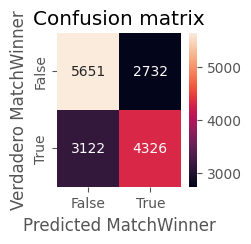

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      8383
           1       0.61      0.58      0.60      7448

    accuracy                           0.63     15831
   macro avg       0.63      0.63      0.63     15831
weighted avg       0.63      0.63      0.63     15831



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con 100 arboles
model_rf = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
# entrenar!
model_rf.fit(X_train, y_train)
# Obtener las predicciones en el conjunto de prueba
pred_y_rf = model_rf.predict(X_test)
# Mostrar los resultados
mostrar_resultados(y_test, pred_y_rf)

In [ ]:
# otro modelo, variando hiperparámetros
model = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)
# a entrenar
model.fit(X_train, y_train)

## Ensamblados

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
random_forest_model = RandomForestClassifier()
model_en = BaggingClassifier(random_forest_model, n_estimators=10)

params = {"base_estimator__max_depth": [2, 3],
          "max_samples": [0.1, 0.2],
          "base_estimator__min_samples_split": [2, 3, 4]}
model = GridSearchCV(estimator=model_en, param_grid=params, cv=5)
model.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor estimador
best_params = model.best_params_
best_estimator = model.best_estimator_
# Obtener las predicciones en el conjunto de prueba utilizando el mejor estimador
pred_y = best_estimator.predict(X_test)



GridSearchCV. Esta clase realiza una búsqueda exhaustiva de las mejores combinaciones de hiperparámetros utilizando validación cruzada.

-Bagging es una técnica de ensamblado que combina múltiples modelos de aprendizaje en paralelo para mejorar la precisión y la estabilidad de las predicciones.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3],
          "min_samples_split": [2,3,4],
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, ytrain)


In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.5943495337227684
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 4, 'n_estimators': 10}


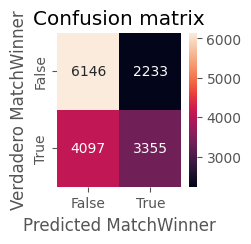

              precision    recall  f1-score   support

           0       0.60      0.73      0.66      8379
           1       0.60      0.45      0.51      7452

    accuracy                           0.60     15831
   macro avg       0.60      0.59      0.59     15831
weighted avg       0.60      0.60      0.59     15831



In [ ]:
y_pred = grid.predict(Xtest)
mostrar_resultados(ytest, y_pred)


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc Random forest
roc_value_rf = roc_auc_score(y_test, pred_y_rf)

In [ ]:
print(roc_value_rf)

0.494295194941171


El modelo tiene una capacidad de discriminación moderada para distinguir entre las clases positivas y negativas. Cuanto más cercano a 1 sea el valor, mejor será la capacidad de discriminación del modelo. La capacidad del modelo para distinguir correctamente entre las diferentes clases o categorías de la variable objetivo,a la capacidad del modelo para clasificar correctamente los casos positivos como positivos y los casos negativos como negativos.Un modelo con una buena discriminación tiene la capacidad de separar claramente las diferentes clases en función de las características y los patrones de los datos. Esto implica que el modelo puede identificar correctamente los casos positivos y negativos, lo que resulta en una clasificación más precisa y confiable.



## Fase 5: Evaluation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

El valor 0.5978870507531787 es el resultado del proceso de optimización del modelo

 La matriz de confusión y el informe de clasificación para evaluar el rendimiento de un modelo de clasificación en un conjunto de datos de prueba.

In [ ]:
#La matriz de confusión muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

Verdaderos positivos: 6307
Falsos positivos: 2110
Falsos negativos: 4272
Verdaderos negativos: 3142
- Precision: el modelo acierta alrededor del 62% de las veces cuando predice la clase 0 y la clase 1.
-Recall:es la proporción de observaciones  positivas correctamente clasificadas sobre el total.  El modelo captura alrededor del 66% de las instancias de la clase 0 y el 53% de las instancias de la clase 1.
-F1-score: Combina la precisión y el recall . El F1-score para la clase 0 es 0.64 y para la clase 1 es 0.56. Un valor de F1-score más alto indica un mejor equilibrio entre la precisión y el recall.
-Soporte: número de instancias reales de cada clase en el conjunto de datos de prueba.La clase 0 es 8407 y para la clase 1 es 7424.
Accuracy: es la proporción de predicciones correctas sobre el total de instancias. La exactitud es 0.60, lo que significa que el modelo clasifica correctamente alrededor del 60% de todas las instancias del conjunto de datos de prueba.
Promedio Ponderado: El promedio ponderado de la precisión, recall y F1-score es 0.60 ,de muestras reales en cada clase.

Regresión Logística - Precisión: 0.5987
Random Forest - Precisión: 0.5616
Ensamblados - Precisión: 0.5785


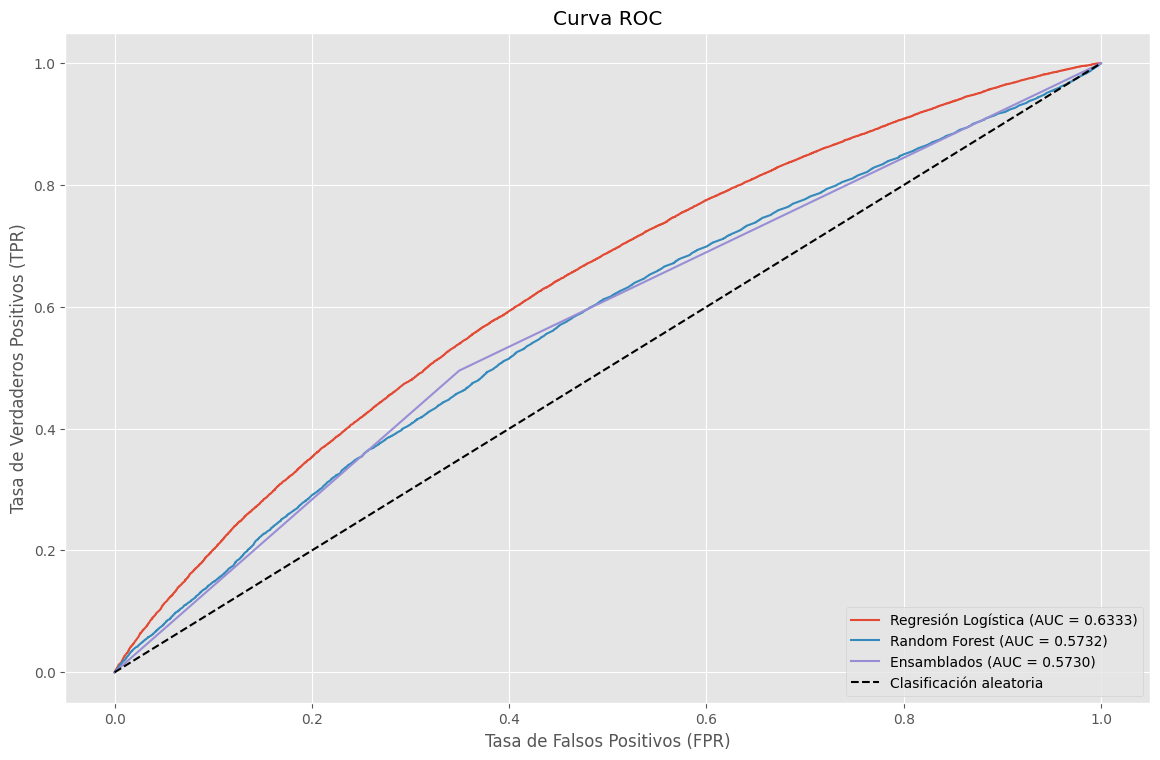

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Crear instancias de los modelos
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
ensemble = VotingClassifier(estimators=[('lr', logistic_regression), ('rf', random_forest)], voting='soft')

# Validación cruzada y obtención de predicciones
models = [logistic_regression, random_forest, ensemble]
model_names = ['Regresión Logística', 'Random Forest', 'Ensamblados']

for i, model in enumerate(models):
    # Validación cruzada
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_names[i]} - Precisión: {scores.mean():.4f}")

    # Obtención de predicciones
    if isinstance(model, VotingClassifier):
        y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    else:
        y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc:.4f})')

# Configuración del gráfico

plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Regresión Logística  con un AUC =0,6342 indica que tiene un rendimiento moderado en la clasificación de instancias positivas y negativas. Un valor de 0.63 indica que el modelo tiene una capacidad razonable para distinguir entre las clases y tomar decisiones de clasificación.

En la curva ROC, se busca que el área bajo la curva (AUC) sea lo más cercana posible a 1, ya que esto indica un mejor rendimiento del modelo. Un AUC de 0.5 indica un rendimiento aleatorio o similar al azar, mientras que un AUC de 1 indica un rendimiento perfecto en relacion a la capacidad de discriminación entre las clases positiva y negativa.






La curva se crea trazando la tasa de verdaderos positivos (TPR) en el eje y y la tasa de falsos positivos (FPR) en el eje x para diferentes valores de umbral.

## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Entrena tu modelo de clasificación
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Guarda el modelo en un archivo
joblib.dump(model, 'modelo_clasificacion.pkl')


['modelo_clasificacion.pkl']

In [ ]:
from flask import Flask, request
import joblib

app = Flask(__name__)

# Carga el modelo desde el archivo
modelo = joblib.load('modelo_clasificacion.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Obtén los datos de entrada desde la solicitud POST
    data = request.json

    # Realiza la predicción utilizando el modelo cargado
    prediction = modelo.predict(data)

    # Retorna la predicción como respuesta
    return {'prediction': prediction}

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
pip install flask